In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Loading the dataset
coffee_df = pd.read_csv("index.csv")
coffee_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Make dataset copy
coffee_sales_df = coffee_df.copy()
coffee_sales_df.head(20)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [5]:
# Check the last columns of dataset
coffee_sales_df.tail()

,date,datetime,cash_type,card,money,coffee_name
2833,2025-01-22,2025-01-22 18:49:59.374,card,ANON-0000-0000-1119,35.76,Cocoa
2834,2025-01-22,2025-01-22 19:10:26.039,card,ANON-0000-0000-1051,30.86,Americano with Milk
2835,2025-01-22,2025-01-22 19:11:23.124,card,ANON-0000-0000-1051,35.76,Cappuccino
2836,2025-01-22,2025-01-22 19:29:15.703,card,ANON-0000-0000-1120,35.76,Latte
2837,2025-01-22,2025-01-22 20:14:30.728,card,ANON-0000-0000-1121,30.86,Americano with Milk


In [6]:
# Check missing values
coffee_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2838 non-null   object 
 1   datetime     2838 non-null   object 
 2   cash_type    2838 non-null   object 
 3   card         2749 non-null   object 
 4   money        2838 non-null   float64
 5   coffee_name  2838 non-null   object 
dtypes: float64(1), object(5)
memory usage: 133.2+ KB


In [7]:
coffee_sales_df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
coffee_sales_df.shape

(2838, 6)

In [9]:
# Fill the missing values in card column with cash
coffee_sales_df["card"].fillna('cash', inplace=True)
coffee_sales_df.head(20)

C:\Users\User\AppData\Local\Temp\ipykernel_7684\3242775822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coffee_sales_df["card"].fillna('cash', inplace=True)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [10]:
# Check data type in date column
type(coffee_sales_df["date"][0])

str

In [11]:
# Check data type in datetime column
type(coffee_sales_df["datetime"][0])

str

In [12]:
# Convert both date and datetime columns in to datetime format
#coffee_sales_df['date'] = pd.to_datetime(coffee_sales_df['date']).dt.date 
coffee_sales_df['date'] = pd.to_datetime(coffee_sales_df['date']) 
coffee_sales_df['datetime'] = pd.to_datetime(coffee_sales_df['datetime'])  

In [13]:
# Display the first five rows of dataset
coffee_sales_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [14]:
# Confirm data type in date column
type(coffee_sales_df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Confirm data type in datetime column
type(coffee_sales_df["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Time Series Exploratory Data Analysis

In [16]:
# Calculate daily sales
df_daily_sales = coffee_sales_df.groupby('date').size().reset_index(name='sales_count')
df_daily_sales.head()

,date,sales_count
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9


In [17]:
# Calculate daily revenue
df_daily_revenue = coffee_sales_df.groupby('date')['money'].sum().reset_index()
df_daily_revenue.head()

,date,money
0,2024-03-01,396.3
1,2024-03-02,228.1
2,2024-03-03,349.1
3,2024-03-04,135.2
4,2024-03-05,338.5


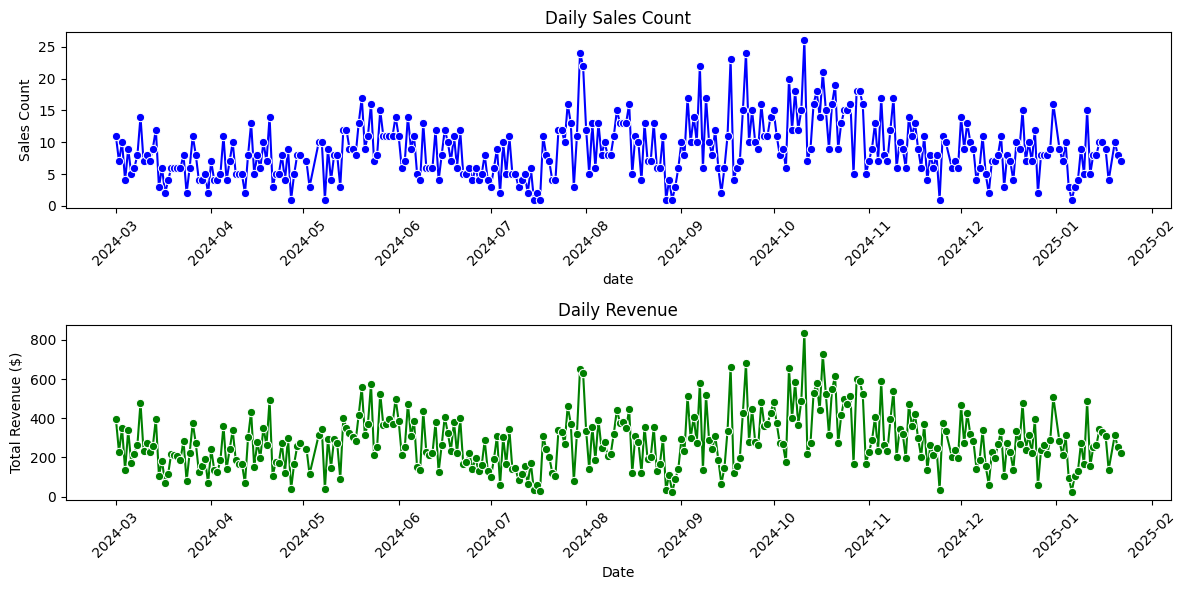

In [18]:
plt.figure(figsize=(12, 6))

# Plot Sales Count
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='sales_count', data=df_daily_sales, marker='o', color='b')
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.title("Daily Sales Count")

# Plot Revenue
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='money', data=df_daily_revenue, marker='o', color='g')
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.title("Daily Revenue")

# Show plots
plt.tight_layout()
plt.show()



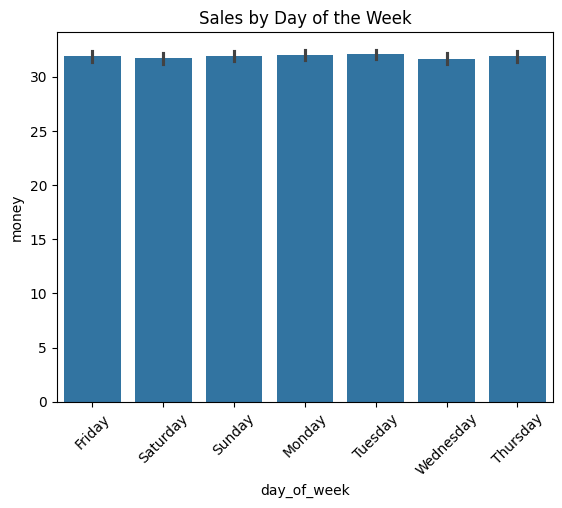

In [19]:
# Plot sales by day of the week
coffee_sales_df['day_of_week'] = coffee_sales_df['date'].dt.day_name()
sns.barplot(x='day_of_week', y='money', data=coffee_sales_df)  
plt.xticks(rotation=45)
plt.title("Sales by Day of the Week")
plt.show()


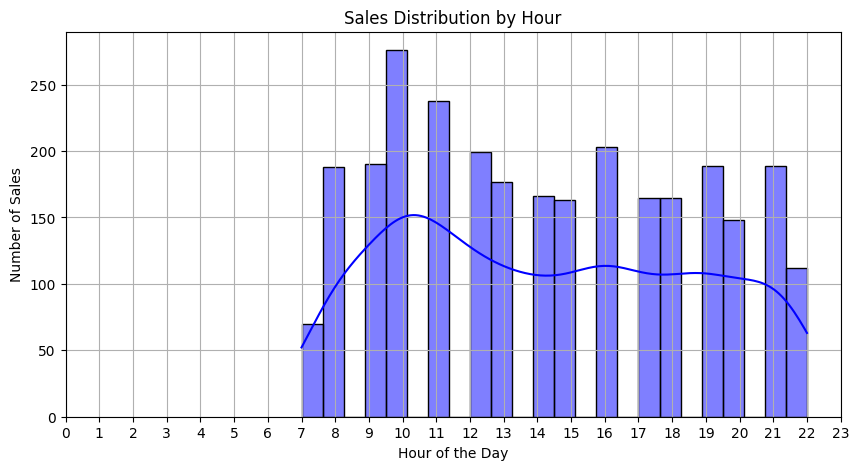

In [20]:
# Extract hour from datetime
coffee_sales_df['hour'] = coffee_sales_df['datetime'].dt.hour

# Plot sales distribution by hour
plt.figure(figsize=(10, 5))
sns.histplot(coffee_sales_df['hour'], bins=24, kde=True, color='b')

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sales")
plt.title("Sales Distribution by Hour")
plt.xticks(range(0, 24))  # Ensure x-axis has all hours
plt.grid(True)

# Show plot
plt.show()

### Time Series Forecasting

In [21]:
# Set date column as the index
df_forecast = df_daily_sales.set_index('date')
df_forecast.index = pd.to_datetime(df_forecast.index)
df_forecast = df_forecast.asfreq('D') 

In [22]:
# Fill missing values with zero
df_forecast['sales_count'] = df_forecast['sales_count'].fillna(0)

In [23]:
# Splitting the data chronogically
train_size = int(len(df_forecast) * 0.8)  # Use 80% for training
train, test = df_forecast[:train_size], df_forecast[train_size:]

In [24]:
# Check for Stationarity
result = adfuller(df_forecast['sales_count'])
print(f"p-value: {result[1]}")  # If p-value < 0.05, data is stationary

p-value: 0.005072453770236905


In [25]:
# Train the ARIMA model
model = ARIMA(train['sales_count'], order=(5,1,0))  # (p,d,q) values should be tuned
model_fit = model.fit()

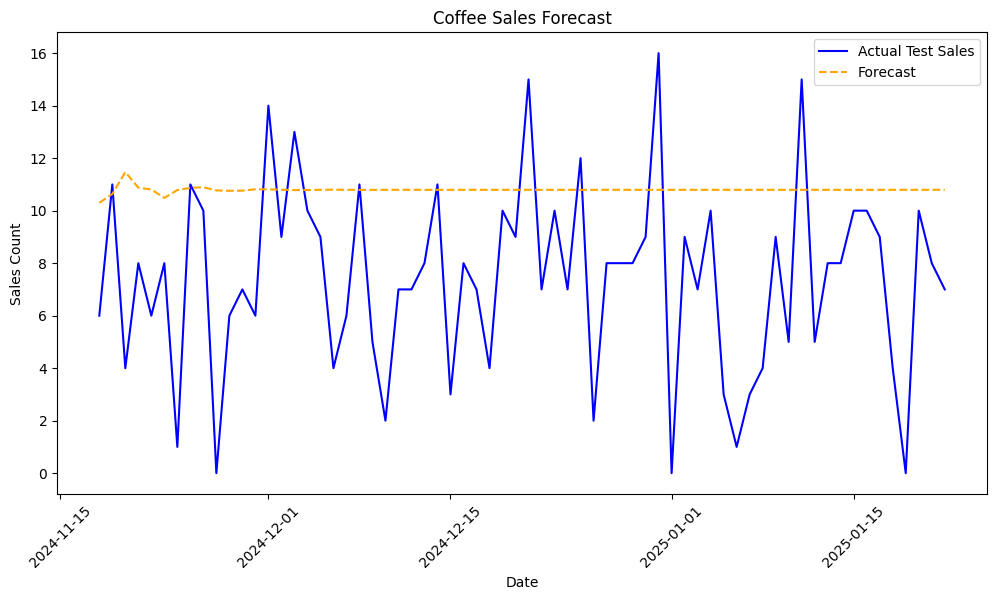

In [32]:
# Make predictions
# Generate forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)  # Convert to Pandas Series

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['sales_count'], label='Actual Test Sales', color='blue')
plt.plot(test.index, forecast, label="Forecast", linestyle="dashed", color="orange")

plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.title("Coffee Sales Forecast")
plt.legend()
plt.xticks(rotation=45)

plt.show()



### Analyzing Specific Customer Purchases

In [ ]:
# Identify top customers using the card id
top_customers = coffee_sales_df['card'].value_counts().head(10)
print(top_customers)

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141     99
cash                    89
ANON-0000-0000-0276     67
ANON-0000-0000-0009     67
ANON-0000-0000-0040     50
ANON-0000-0000-0097     47
ANON-0000-0000-0507     43
ANON-0000-0000-0003     31
ANON-0000-0000-0570     30
Name: count, dtype: int64


In [ ]:
# Find the most purchased coffee type per customer
favorite_coffee = coffee_sales_df.groupby(['card', 'coffee_name']).size().reset_index(name='purchase_count')
favorite_coffee = favorite_coffee.loc[favorite_coffee.groupby('card')['purchase_count'].idxmax()]
print(favorite_coffee)

                     card          coffee_name  purchase_count
0     ANON-0000-0000-0001                Latte              17
1     ANON-0000-0000-0002        Hot Chocolate               2
2     ANON-0000-0000-0003            Americano              23
8     ANON-0000-0000-0004  Americano with Milk               6
10    ANON-0000-0000-0005  Americano with Milk               1
...                   ...                  ...             ...
1497  ANON-0000-0000-1118             Espresso               1
1498  ANON-0000-0000-1119                Cocoa               1
1499  ANON-0000-0000-1120                Latte               1
1500  ANON-0000-0000-1121  Americano with Milk               1
1508                 cash                Latte              25

[1122 rows x 3 columns]


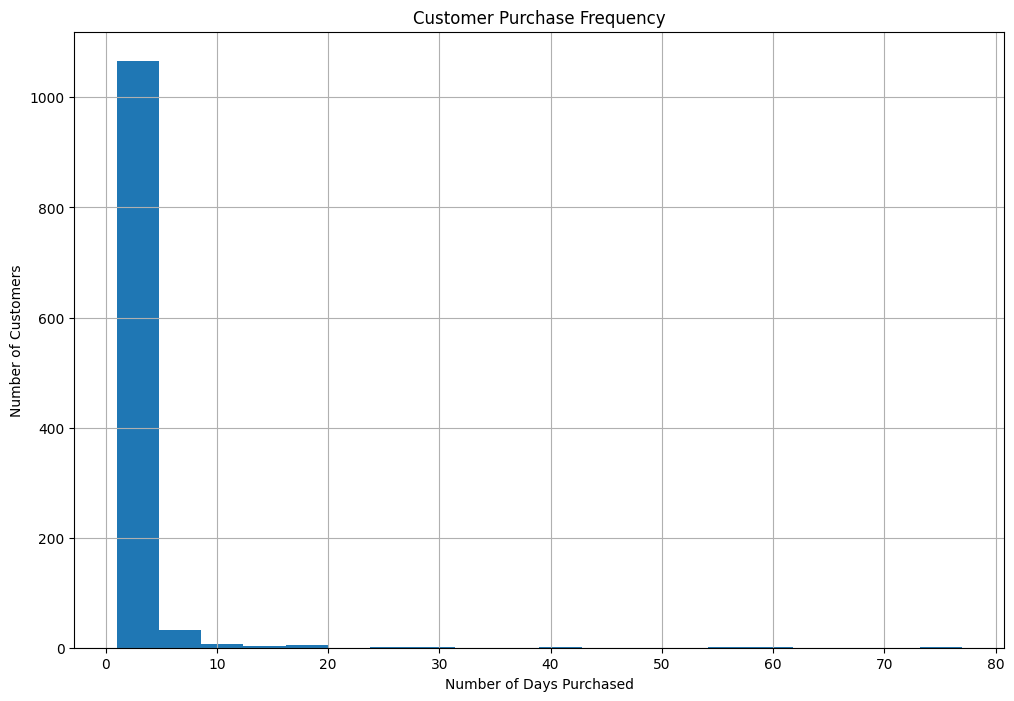

In [ ]:
# Calculate customer purchase frequency
purchase_freq = coffee_sales_df.groupby('card')['date'].nunique()
plt.figure(figsize= (12,8))
# Plot the histogram
purchase_freq.hist(bins=20)
plt.xlabel("Number of Days Purchased")
plt.ylabel("Number of Customers")
plt.title("Customer Purchase Frequency")
plt.show()

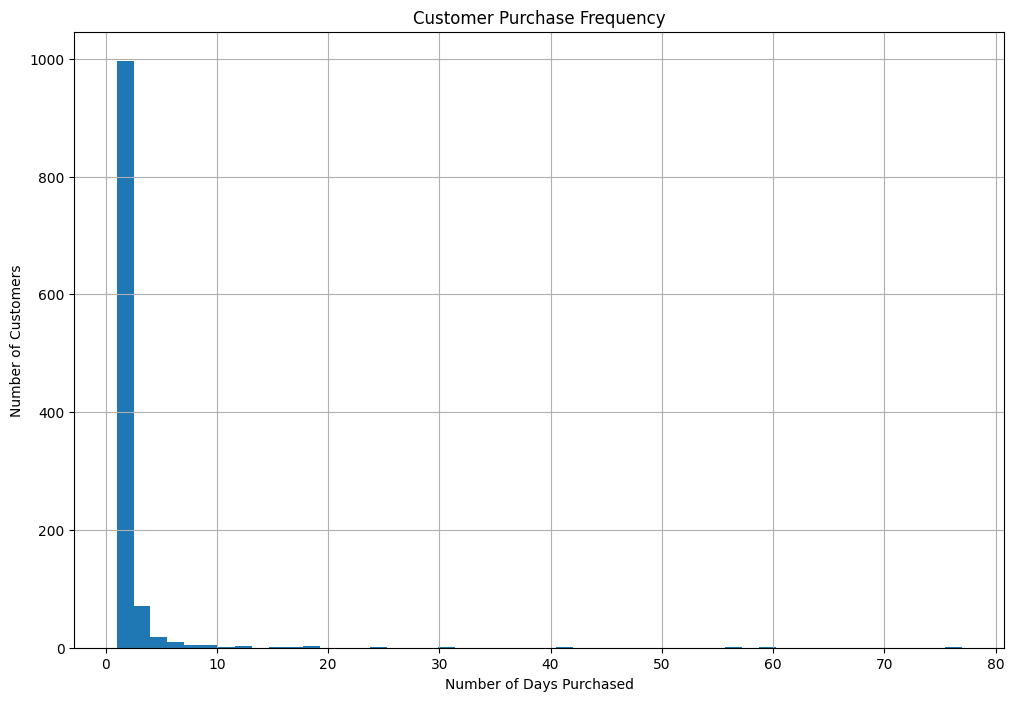

In [ ]:
plt.figure(figsize= (12,8))
purchase_freq.hist(bins=50)  # Increase bins for better granularity
plt.xlabel("Number of Days Purchased")
plt.ylabel("Number of Customers")
plt.title("Customer Purchase Frequency")
plt.show()


In [ ]:
# Identify loyal customers
loyal_customers = purchase_freq[purchase_freq > 10]  # Customers who bought coffee on more than 10 days
print(loyal_customers)


card
ANON-0000-0000-0001    17
ANON-0000-0000-0003    18
ANON-0000-0000-0009    56
ANON-0000-0000-0012    76
ANON-0000-0000-0019    15
ANON-0000-0000-0024    12
ANON-0000-0000-0040    31
ANON-0000-0000-0097    42
ANON-0000-0000-0141    77
ANON-0000-0000-0206    19
ANON-0000-0000-0276    56
ANON-0000-0000-0333    13
ANON-0000-0000-0375    17
ANON-0000-0000-0385    15
ANON-0000-0000-0494    13
ANON-0000-0000-0507    30
ANON-0000-0000-0570    25
ANON-0000-0000-0696    18
ANON-0000-0000-1029    11
cash                   60
Name: date, dtype: int64
